# Q1

Probability of breaking when the curing temperature is 240: 13.32%


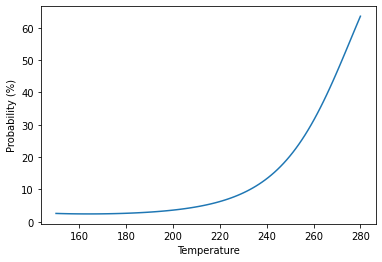

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/womue/s1.csv")
x = df['x']
y = df['y']

#Continue here...
p1 = 0.1  # break
p2 = 0.9  # non-break

sample1 = x[y == 1]
sample2 = x[y == 0]

mu1 = np.mean(sample1)
mu2 = np.mean(sample2)
sig1 = np.sqrt(np.mean(sample1**2) - mu1**2)
sig2 = np.sqrt(np.mean(sample2**2) - mu2**2)

x = np.linspace(150, 280, 100)
# Gaussian probability
likelihood1 = 1/np.sqrt(2*np.pi*sig1**2) * np.exp(-1/2*((x-mu1)/sig1)**2)
likelihood2 = 1/np.sqrt(2*np.pi*sig2**2) * np.exp(-1/2*((x-mu2)/sig2)**2)
evidence = likelihood1*p1 + likelihood2*p2
posterior1 = (likelihood1*p1) / evidence

plt.plot(x, posterior1*100)
plt.xlabel('Temperature (K)')
plt.ylabel('Probability (%)')

p_t240 = np.interp(240, x, posterior1)
print('Probability of breaking when the curing temperature is 240: %.2f%%' % (p_t240*100))

# Q2

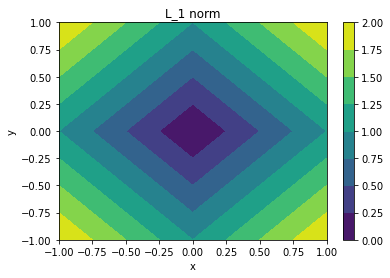

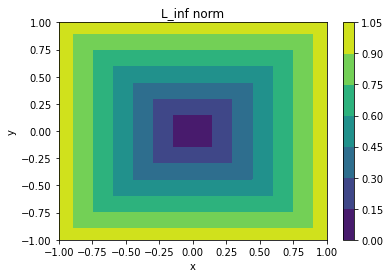

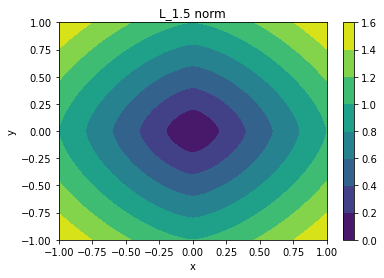

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#This function may be useful to define the sampling grid for this question
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

#Continue here...
Xgrid,x1line,x2line = gen_sample_grid()

def plot_contourf(L_norm, title):
  L_norm = np.reshape(L_norm, [200, 200])
  plt.contourf(x1line, x2line, L_norm)
  plt.colorbar()
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

# L1 = sum(|f(xi) - yi|)
L1 = np.sum(np.abs(Xgrid - 0), axis=1)
plot_contourf(L1, 'L_1 norm')

# L_inf = max(|f(xi), yi|)
L_inf = np.max(np.abs(Xgrid - 0), axis=1)
plot_contourf(L_inf, 'L_inf norm')

# L_1.5 = (sum(|f(xi) - yi|**p))**(1/p)
p = 1.5
L_p = (np.sum(np.abs(Xgrid - 0)**p, axis=1)) ** (1/p)
plot_contourf(L_p, 'L_1.5 norm')


# Q3

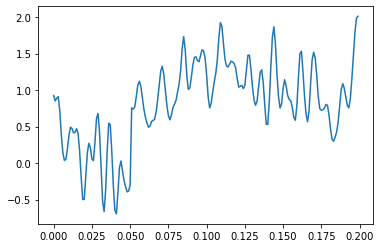

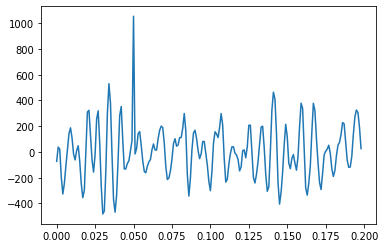

Step change most likely at t=0.050 with derivative=1054.44


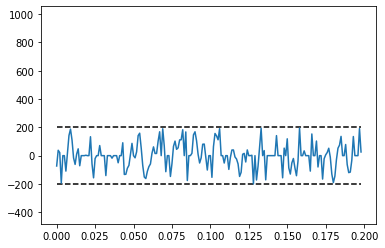

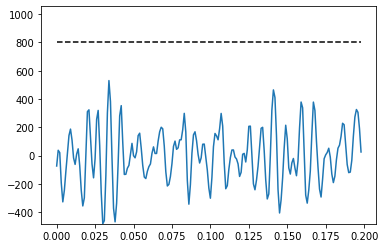

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/womue/s2.csv")
#time values:
t = np.array(df['x'])
#actual data:
sig = np.array(df['y'])

#Continue here...
plt.plot(t, sig)
plt.show()

dt = t[1] - t[0]
dydt = (sig[1:] - sig[:-1]) / dt
plt.plot(t[:-1], dydt)
plt.show()

idx = np.argmax(np.abs(dydt))
print('Step change most likely at t=%.3f with derivative=%.2f' % (t[idx], dydt[idx]))

# if the threshold is too low: useful signals could be filtered
threshold = 200
dydt_filtered = dydt.copy()
dydt_filtered[abs(dydt_filtered)>threshold] = 0
plt.plot(t[:-1], dydt_filtered)
plt.hlines([threshold, -threshold], t[0], t[-2], linestyle='--')
plt.ylim([np.min(dydt), np.max(dydt)])
plt.show()

# if the threshold is too high: unwanted signals could be captured
threshold = 800
dydt_filtered = dydt.copy()
dydt_filtered[abs(dydt_filtered)>threshold] = 0
plt.plot(t[:-1], dydt_filtered)
plt.hlines([threshold, -threshold], t[0], t[-2], linestyle='--')
plt.ylim([np.min(dydt), np.max(dydt)])
plt.show()

**Answer**:
3(b)(i): If the threshold is too low, other peaks within the dataset will be registered.

(ii): If the threshold is too high, it will miss true jumps.

# Q4

**Answer:** 4(a) Nonlinearity enables complexity within the network. In a network many nonlinear functions are combined together enabling arbitrarily complex functions to be captured. Conversely with linear functions, the output must always remain linear.

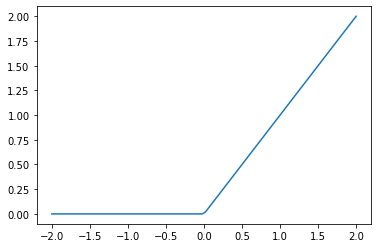

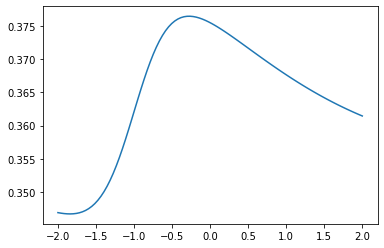

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# (a)
# Some features have non-linear relationships. Linear activation 
# functions are not enough to capture all the relationships.

# (b)
x = np.linspace(-2, 2, 100)
y = x.copy()
y[y<0] = 0
plt.plot(x, y)
plt.show()

# (c)
def sigmoid(x):
  S = 1 / (1 + np.exp(-x))
  return S

y1 = sigmoid(4*x + 4)
y2 = sigmoid(-0.8*x - 0.1)
z1 = sigmoid(0.2*y1 + 0.2*y2 - 0.8)
plt.plot(x, z1)
plt.show()

# Q5

(a)
Type is a non-metric parameter, the 'closeness' between to points
cannot be evalusted. Decision tree is suitable for non-metric 
parameters.

(b)
In this case 'type' is not an input. All the rest are metric 
parameters. The closeness between two points can be measured. 
Therefore random forest would not longer be the most appropriate.


**Answer:**(a) Type is a non-metric parameter (it has no concept of 'closeness'). Decision tree methods (inc. random forests) work with non-metric methods.

(b) Since the type parameter has effectively been removed, the problem becomes a metric-based one since all the other parameters are metric. Therefore other methods could be used if preferred.

# Q6

In [40]:
p1 = np.array((2/3,1/3,2/3))
p2 = np.array((1/3,2/3,-2/3))

#Continue here...
p3 = np.cross(p1, p2)
print(p3)

x = np.array([3, 2, 1])
# t1, t2, t3 are scalar, they are the projection of x on the principal components
t1 = np.dot(p1, x)
t2 = np.dot(p2, x)
t3 = np.dot(p3, x)

x_ = t1*p1 + t2*p2 + t3*p3
print(x_)

[-0.66666667  0.66666667  0.33333333]
[3. 2. 1.]


# Q7

(a)
(i). Increase the spatical resolution.
(ii). Reduce the variance so increase probability accuracy.

**Answer:**(a) (i) A small window captures the fine details and is accurate in space.

(ii) A large window averages more samples so gives more accurate probability across the range.

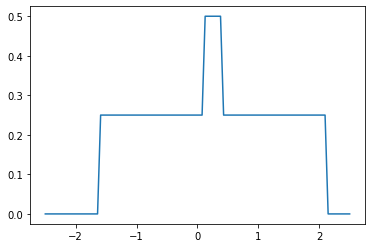

In [45]:
#(b)
x = np.linspace(-2.5, 2.5, 100)

def Parzen(x, x_center, h):
  u = (x_center - x) / h
  if np.abs(u) < 0.5:
    return 1
  else:
    return 0

m = 2
h = 2
p = 1/m * (1/h*np.array([Parzen(i, -0.6, h) for i in x]) + (1/h*np.array([Parzen(i, 1.1, h) for i in x])))
plt.plot(x, p)
plt.show()

In [61]:
#(c)

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/womue/s3.csv")
#time values:
x1 = np.array(df['x1'])
#actual data:
x2 = np.array(df['x2'])

#Continue here...

def Parzen2D(x, x_center, h):
  u = (np.sqrt((x[0]-x_center[0])**2 + (x[1]-x_center[1])**2)) / h
  if np.abs(u) < 0.5:
    return 1
  else:
    return 0

m = len(x1)
h = 0.5
S = 0
for i in range(m):
  S += Parzen2D([1, 0.5], [x1[i], x2[i]], h)
p = 1/(m*h) * S
print(p)

0.24


**Wrong solution.**
**See correct solution below:**


In [64]:
#(c)

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/womue/s3.csv")
#time values:
x1 = np.array(df['x1'])
#actual data:
x2 = np.array(df['x2'])

#Continue here...

def Parzen2D(x, x_center, h):
  ux = (x[0]-x_center[0]) / h
  uy = (x[1]-x_center[1]) / h
  if (np.abs(ux) < 0.5) & (np.abs(uy) < 0.5):
    return 1
  else:
    return 0

m = len(x1)
h = 0.5
S = 0
for i in range(m):
  S += Parzen2D([1, 0.5], [x1[i], x2[i]], h)
p = 1/(m * h**2) * S  # 2D so h**2
print(p)

0.56
